In [12]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

source_dir = '/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects'

coco_dir = os.path.join(source_dir, 'coco')
image_dir = os.path.join(source_dir, 'images')
annos_dir = os.path.join(source_dir, 'annotations')

os.makedirs(coco_dir, exist_ok=True)

df = []

In [13]:
for dir in os.listdir(image_dir):
    for file in os.listdir(os.path.join(image_dir, dir)):
        df.append((
            os.path.join(image_dir, dir, file),
            os.path.join(annos_dir, dir, os.path.splitext(file)[0])
        ))
        
df = pd.DataFrame(df, columns=['image_file', 'anno_file'])

df

,image_file,anno_file
0,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
1,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
2,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
3,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
4,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
...,...,...
20575,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
20576,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
20577,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...
20578,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...


In [14]:
def load_annotation(row):
    
    anno = None
    with open(row.anno_file, 'r') as f:
        anno = ET.fromstring(f.read())

    width = anno.find('size').find('width').text
    height = anno.find('size').find('height').text
    
    boxes = anno.findall('object')
    
    rows = []
    
    for box in boxes:
        box = box.find('bndbox')
        xmin = box.find('xmin').text
        ymin = box.find('ymin').text
        xmax = box.find('xmax').text
        ymax = box.find('ymax').text
        rows.append([row.image_file, row.anno_file, width, height, [xmin, ymin, xmax, ymax]])
    
    return pd.DataFrame(rows, columns=['image_file', 'anno_file', 'image_width', 'image_height', 'box'])

new_df = pd.DataFrame(columns=['image_file', 'anno_file', 'image_width', 'image_height', 'box'])

for row in df.itertuples():
    new_df = pd.concat([new_df, load_annotation(row)], ignore_index=True)

new_df

,image_file,anno_file,image_width,image_height,box
0,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,375,"[176, 164, 348, 374]"
1,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,333,"[227, 116, 403, 307]"
2,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,317,"[24, 84, 300, 249]"
3,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,333,"[195, 79, 340, 292]"
4,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,333,"[324, 16, 499, 229]"
...,...,...,...,...,...
22121,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,470,500,"[0, 207, 467, 493]"
22122,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,500,333,"[135, 51, 495, 235]"
22123,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,315,500,"[90, 141, 273, 437]"
22124,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,/home/jack/Mounts/DiskOne/doggy_cam/datasets/d...,790,772,"[59, 61, 658, 770]"


In [16]:
df = new_df

In [17]:
# find bounding box area ratio to image area

df['box_area'] = (df.box.str[2].astype(int) - df.box.str[0].astype(int)) * (df.box.str[3].astype(int) - df.box.str[1].astype(int))

df['image_area'] = df.image_width.astype(int) * df.image_height.astype(int)

df['box_to_image_area_ratio'] = df.box_area / df.image_area

Text(0.5, 1.0, 'Bounding Box Area Ratio to Image Area')

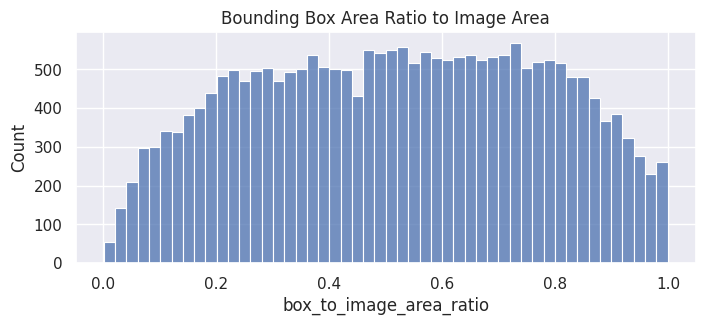

In [18]:
plt.figure(figsize=(8, 3))
sns.histplot(df.box_to_image_area_ratio, bins=50)
plt.title('Bounding Box Area Ratio to Image Area')

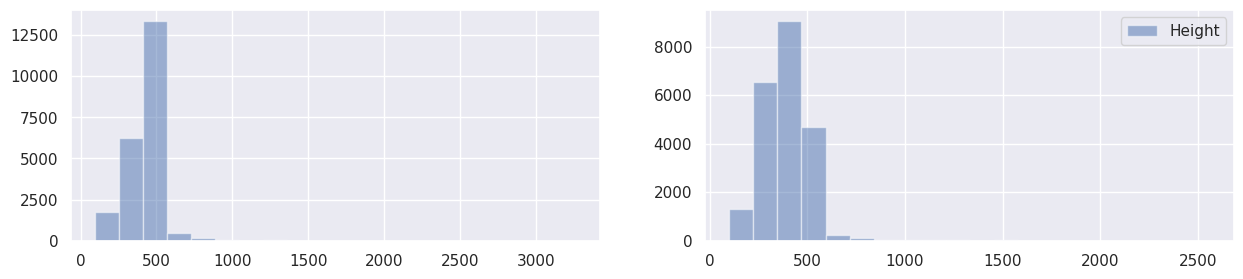

In [19]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.hist(df.image_width.astype(int), bins=20, alpha=0.5, label='Width')

plt.subplot(1, 2, 2)
plt.hist(df.image_height.astype(int), bins=20, alpha=0.5, label='Height')
plt.legend()

plt.show()

In [20]:
import json

coco_data = {
    "info": {
        "description": "Dog Objects Dataset",
    },
    "images": [],
    "annotations": [],
    "categories": [
        {
            "id": 1,
            "name": "dog",
            "supercategory": "animal"
        }
    ]
}

for row in df.itertuples():
    image_file = row.image_file
    box  = row.box
    
    new_image_file = os.path.join(coco_dir, os.path.basename(image_file))
    
    # copy image file to coco directory
    if not os.path.exists(new_image_file):
        os.system(f'cp {image_file} {new_image_file}')
    
    coco_data['images'].append({
        "id": row.Index,
        "file_name": os.path.basename(new_image_file),
        "width": row.image_width,
        "height": row.image_height
    })
    
    coco_data['annotations'].append({
        "id": row.Index,
        "image_id": row.Index,
        "category_id": 1,
        "bbox": [int(x) for x in box],
        "area": row.box_area,
        "iscrowd": 0
    })


with open(os.path.join(coco_dir, 'coco.json'), 'w') as f:
    f.write(json.dumps(coco_data, indent=4))

In [22]:
import json
import random
import os
from tqdm import tqdm

coco_dir = '/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects/coco'
yolo_dir = '/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects/yolo'

def coco_to_yolo(x1, y1, x2, y2, frame_shape):
    # convert xmin, ymin, xmax, ymax to normalized center pixel xc, xy, width, height
    xc = ((x1 + x2) / 2) / frame_shape[1]
    yc = ((y1 + y2) / 2) / frame_shape[0]
    w = (x2 - x1) / frame_shape[1]
    h = (y2 - y1) / frame_shape[0]
    
    return xc, yc, w, h

def yolo_to_coco(xc, yc, width, height, frame_shape):
    x1 = int((xc - width / 2) * frame_shape[1])
    x2 = int((xc + width / 2) * frame_shape[1])
    y1 = int((yc - height / 2) * frame_shape[0])
    y2 = int((yc + height / 2) * frame_shape[0])
    
    return x1, y1, x2, y2

os.makedirs(yolo_dir, exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'images', 'test'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'images', 'val'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'labels', 'test'), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, 'labels', 'val'), exist_ok=True)

with open(os.path.join(coco_dir, 'coco.json'), 'r') as f:
    coco_data = json.load(f)

images = coco_data['images']
annotations = coco_data['annotations']

train = random.sample(images, int(len(images) * 0.7))
images = [x for x in images if x not in train]

test = random.sample(images, int(len(images) * 0.7))
images = [x for x in images if x not in test]

val = images

for sett, images in zip(['train', 'test', 'val'], [train, test, val]):
    for image in tqdm(images, desc=sett):
        image_file = os.path.join(coco_dir, image['file_name'])
        new_image_file = os.path.join(yolo_dir, 'images', sett, image['file_name'])
        os.system(f'cp {image_file} {new_image_file}')
        
        image_width = int(image['width'])
        image_height = int(image['height'])
        
        with open(os.path.join(yolo_dir, 'labels', sett, os.path.splitext(image['file_name'])[0] + '.txt'), 'w') as f:
            for annotation in annotations:
                if annotation['image_id'] == image['id']:
                    
                    box = annotation['bbox']
                    xc, yc, width, height = coco_to_yolo(*box, (image_height, image_width))

                    f.write(f'0 {xc} {yc} {width} {height}\n')

val: 100%|██████████| 1992/1992 [00:08<00:00, 234.15it/s]
